## Project 3 : ML
### Objective : 
To  build a model, useing bank dataset,  that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### Dataset Description: 

>> Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this
client
16. poutcome: outcome of the previous marketing campaign

>> Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)



https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-ssetty3.git

In [1]:
#Primary Basic imports
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from PIL import Image 
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm # Imported this, since recived a warning comment


C:\root\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Understanding the data Set
Bank_data= pd.read_csv('bank-full.csv')
Bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# To see the shape of the data Frame
print('The shape of the data frame Rows*Columns is = ', Bank_data.shape , "\n--------------------------------------") 
print(Bank_data.info())

The shape of the data frame Rows*Columns is =  (45211, 17) 
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Data types , have some confusion, data looks in good shape.
#Checking for missing data
print (Bank_data.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [5]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [6]:
#import pandas_profiling
#from pandas_profiling import ProfileReport

In [7]:
#pandas_profiling.ProfileReport(Bank_data)

### Observation: 
1. No Missing data, But the variables Job has " Unknown" Values, education has "Unknow" (1857) values, contacts has "Unknow" values and Poutcome has large scale of "unknow" (36959) values. 
2. To look into the data in depth, as starting the selecting the three variables ( Job, education and Target) and try to understand to take next steps for the unknow data.


In [8]:
# Useing group by method to extarct the "Unknow" data values
print("The Job key groups are :",'\n----V----V----V----V')
print(Bank_data.groupby(['job']).groups.keys())
print ("\n>> -------------------------------- <<")
print("The Education key groups are : ",'\n ----V----V----V----V ')
print(Bank_data.groupby(['education']).groups.keys())
print ("\n>> -------------------------------- <<")
print("The  previous marketing campaign outcome  key groups are : ",'\n ----V----V----V----V ')
print(Bank_data.groupby(['poutcome']).groups.keys())

The Job key groups are : 
----V----V----V----V
dict_keys(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'])

>> -------------------------------- <<
The Education key groups are :  
 ----V----V----V----V 
dict_keys(['primary', 'secondary', 'tertiary', 'unknown'])

>> -------------------------------- <<
The  previous marketing campaign outcome  key groups are :  
 ----V----V----V----V 
dict_keys(['failure', 'other', 'success', 'unknown'])


In [9]:
print("The Total < UKNOWN > data elements in given < Job > column data : ",len(Bank_data.groupby(['job']).groups['unknown']))
print("\n The Total < UKNOWN > data elements in given < Education > column data : ",len(Bank_data.groupby(['education']).groups['unknown']))
print("\n The Total < UKNOWN > data elements in given < poutcome > column data : ",len(Bank_data.groupby(['poutcome']).groups['unknown']))
print("\n The Total < OTHER > data elements in given < poutcome > column data : ",len(Bank_data.groupby(['poutcome']).groups['other']))

The Total < UKNOWN > data elements in given < Job > column data :  288

 The Total < UKNOWN > data elements in given < Education > column data :  1857

 The Total < UKNOWN > data elements in given < poutcome > column data :  36959

 The Total < OTHER > data elements in given < poutcome > column data :  1840


### Observation :
* From the Profiling co-relation observation, it seems like there is considerable co-realtion between the poutcome data and the Target. Hence would not be deleting the UKNOW data elements. Shall replace OTHERS element to UNKNOW manually.
* JOB and Education columns UNKNOW elements will replace with OTHER if any co-relation that can help in ML model analysis to verify  target.

In [10]:
Bank_data[['job','education']] = Bank_data[['job','education']].replace(['unknown'],'other')

In [11]:
Bank_data[['poutcome']] = Bank_data[['poutcome']].replace(['other'],'unknown')

In [12]:
# to Verify the Groups
print("The Job key groups are :",'\n----V----V----V----V')
print(Bank_data.groupby(['job']).groups.keys())
print ("\n>> -------------------------------- <<")
print("The Education key groups are : ",'\n ----V----V----V----V ')
print(Bank_data.groupby(['education']).groups.keys())
print ("\n>> -------------------------------- <<")
print("The  previous marketing campaign outcome  key groups are : ",'\n ----V----V----V----V ')
print(Bank_data.groupby(['poutcome']).groups.keys())

The Job key groups are : 
----V----V----V----V
dict_keys(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'other', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed'])

>> -------------------------------- <<
The Education key groups are :  
 ----V----V----V----V 
dict_keys(['other', 'primary', 'secondary', 'tertiary'])

>> -------------------------------- <<
The  previous marketing campaign outcome  key groups are :  
 ----V----V----V----V 
dict_keys(['failure', 'success', 'unknown'])


### * Univarient Analysis

In [13]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='Target', ylabel='count'>

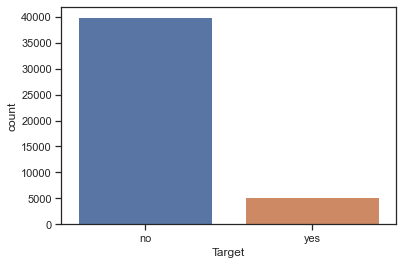

In [14]:
#To Understand the customer base and total opportunity with given data.
sns.countplot(Bank_data['Target'])

Observation: Oppurtunity to target 35000 + customers.

<AxesSubplot:xlabel='age'>

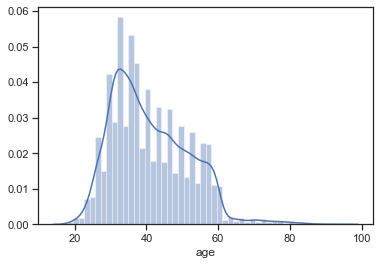

In [15]:
#Age group of people currently doing business
sns.distplot(Bank_data['age'])

Observation: currently Age group seems to be skewed to right and less than 40.93 years age group people are doing more business with bank.

<AxesSubplot:>

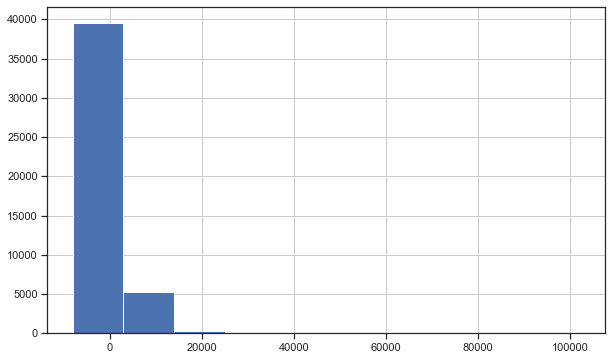

In [16]:
Bank_data['balance'].hist(figsize = (10,6))

Observation: Close to 35000+ customers have the average balance of 1362.3 currency value in account. And with respect to description data the Balance has lot of ouliners as the MAX value it represents is 102127.00 currency value.

<AxesSubplot:>

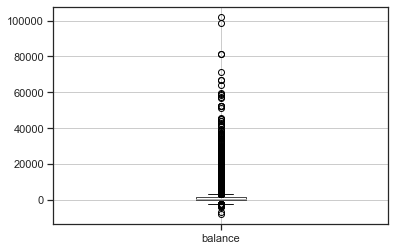

In [17]:
Bank_data.boxplot(column=['balance'])

In [18]:
from scipy.stats import zscore

Bank_data[['balance']].mean()

Bank_data['balance_outliers'] = Bank_data['balance']
Bank_data['balance_outliers']= zscore(Bank_data['balance_outliers'])

condition1 = (Bank_data['balance_outliers']>3) | (Bank_data['balance_outliers']<-3 )
Bank_data1 = Bank_data.drop(Bank_data[condition1].index, axis = 0, inplace = False)

In [19]:
Bank_data3 = Bank_data1.drop('balance_outliers', axis=1)
print(Bank_data3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44466 non-null  int64 
 1   job        44466 non-null  object
 2   marital    44466 non-null  object
 3   education  44466 non-null  object
 4   default    44466 non-null  object
 5   balance    44466 non-null  int64 
 6   housing    44466 non-null  object
 7   loan       44466 non-null  object
 8   contact    44466 non-null  object
 9   day        44466 non-null  int64 
 10  month      44466 non-null  object
 11  duration   44466 non-null  int64 
 12  campaign   44466 non-null  int64 
 13  pdays      44466 non-null  int64 
 14  previous   44466 non-null  int64 
 15  poutcome   44466 non-null  object
 16  Target     44466 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.1+ MB
None


<AxesSubplot:>

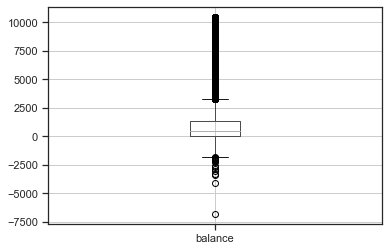

In [20]:
Bank_data3.boxplot(column=['balance'])

Observation : Droped the outliners in balance column which are more than three standard deviations away from the mean. In sum, 745 rows of data were removed

In [21]:
Bank_data3.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000
mean,40.882382,1084.544483,15.803558,258.057662,2.765506,40.244614,0.579544
std,10.596139,1721.069271,8.328517,257.439656,3.100462,100.268044,2.310143
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,431.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1347.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,10483.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


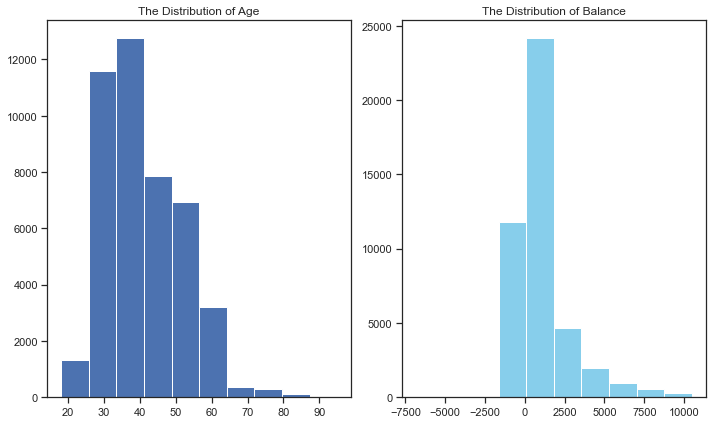

In [22]:
hist1 = plt.figure(figsize = (10,6))
ra1 = hist1.add_subplot(1,2,1) 
ra2 = hist1.add_subplot(1,2,2)

ra1.hist(Bank_data3['age'], )
ra1.set_title('The Distribution of Age')

ra2.hist(Bank_data3['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

### * Bivarient Analysis

In [23]:
Bank_data3.head (3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [24]:
# Makeing data Binary, Starting from Target, Job and Months
Bank_data3[['Target']] = Bank_data3[['Target']].replace(['no'],'0')
Bank_data3[['Target']] = Bank_data3[['Target']].replace(['yes'],'1')
#verification by group function
print("The  Target key groups are : ",'\n ----V----V----V----V ')
print(Bank_data3.groupby(['Target']).groups.keys())


The  Target key groups are :  
 ----V----V----V----V 
dict_keys(['0', '1'])


In [25]:
# Covertion from Object to float
Bank_data3['Target'] = Bank_data3['Target'].astype(float)
print(Bank_data3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44466 non-null  int64  
 1   job        44466 non-null  object 
 2   marital    44466 non-null  object 
 3   education  44466 non-null  object 
 4   default    44466 non-null  object 
 5   balance    44466 non-null  int64  
 6   housing    44466 non-null  object 
 7   loan       44466 non-null  object 
 8   contact    44466 non-null  object 
 9   day        44466 non-null  int64  
 10  month      44466 non-null  object 
 11  duration   44466 non-null  int64  
 12  campaign   44466 non-null  int64  
 13  pdays      44466 non-null  int64  
 14  previous   44466 non-null  int64  
 15  poutcome   44466 non-null  object 
 16  Target     44466 non-null  float64
dtypes: float64(1), int64(7), object(9)
memory usage: 6.1+ MB
None


In [26]:
Bank_data4 = pd.get_dummies(Bank_data3, columns=['job'])

In [27]:
print(Bank_data4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44466 non-null  int64  
 1   marital            44466 non-null  object 
 2   education          44466 non-null  object 
 3   default            44466 non-null  object 
 4   balance            44466 non-null  int64  
 5   housing            44466 non-null  object 
 6   loan               44466 non-null  object 
 7   contact            44466 non-null  object 
 8   day                44466 non-null  int64  
 9   month              44466 non-null  object 
 10  duration           44466 non-null  int64  
 11  campaign           44466 non-null  int64  
 12  pdays              44466 non-null  int64  
 13  previous           44466 non-null  int64  
 14  poutcome           44466 non-null  object 
 15  Target             44466 non-null  float64
 16  job_admin.         444

In [28]:
# Month column convertion to int data type, trying (prefering) .loc method since the labelencoder method starts convertion 
# of data from Zero, like when starting from 1, easy to co-relate to months
Month = [Bank_data4]
for column in Month:
    column.loc[column["month"] == "jan", "months"] = 1
    column.loc[column["month"] == "feb", "months"] = 2
    column.loc[column["month"] == "mar", "months"] = 3
    column.loc[column["month"] == "apr", "months"] = 4
    column.loc[column["month"] == "may", "months"] = 5
    column.loc[column["month"] == "jun", "months"] = 6
    column.loc[column["month"] == "jul", "months"] = 7
    column.loc[column["month"] == "aug", "months"] = 8
    column.loc[column["month"] == "sep", "months"] = 9
    column.loc[column["month"] == "oct", "months"] = 10
    column.loc[column["month"] == "nov", "months"] = 11
    column.loc[column["month"] == "dec", "months"] = 12
  

In [29]:
Bank_data4.head(5)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,0,1,0,0,0,0,0,0,0,5.0
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,5.0
2,33,married,secondary,no,2,yes,yes,unknown,5,may,...,0,0,0,0,0,0,0,0,0,5.0
3,47,married,other,no,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,5.0
4,33,single,other,no,1,no,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,5.0


In [30]:
# Preparing data for Bivarinent Analysis.
# Droping the duplicate and non-used columns, month (Object type),day

Bank_data5=Bank_data4.drop(columns=['contact', 'month','day'])

In [31]:
print(Bank_data5.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44466 non-null  int64  
 1   marital            44466 non-null  object 
 2   education          44466 non-null  object 
 3   default            44466 non-null  object 
 4   balance            44466 non-null  int64  
 5   housing            44466 non-null  object 
 6   loan               44466 non-null  object 
 7   duration           44466 non-null  int64  
 8   campaign           44466 non-null  int64  
 9   pdays              44466 non-null  int64  
 10  previous           44466 non-null  int64  
 11  poutcome           44466 non-null  object 
 12  Target             44466 non-null  float64
 13  job_admin.         44466 non-null  uint8  
 14  job_blue-collar    44466 non-null  uint8  
 15  job_entrepreneur   44466 non-null  uint8  
 16  job_housemaid      444

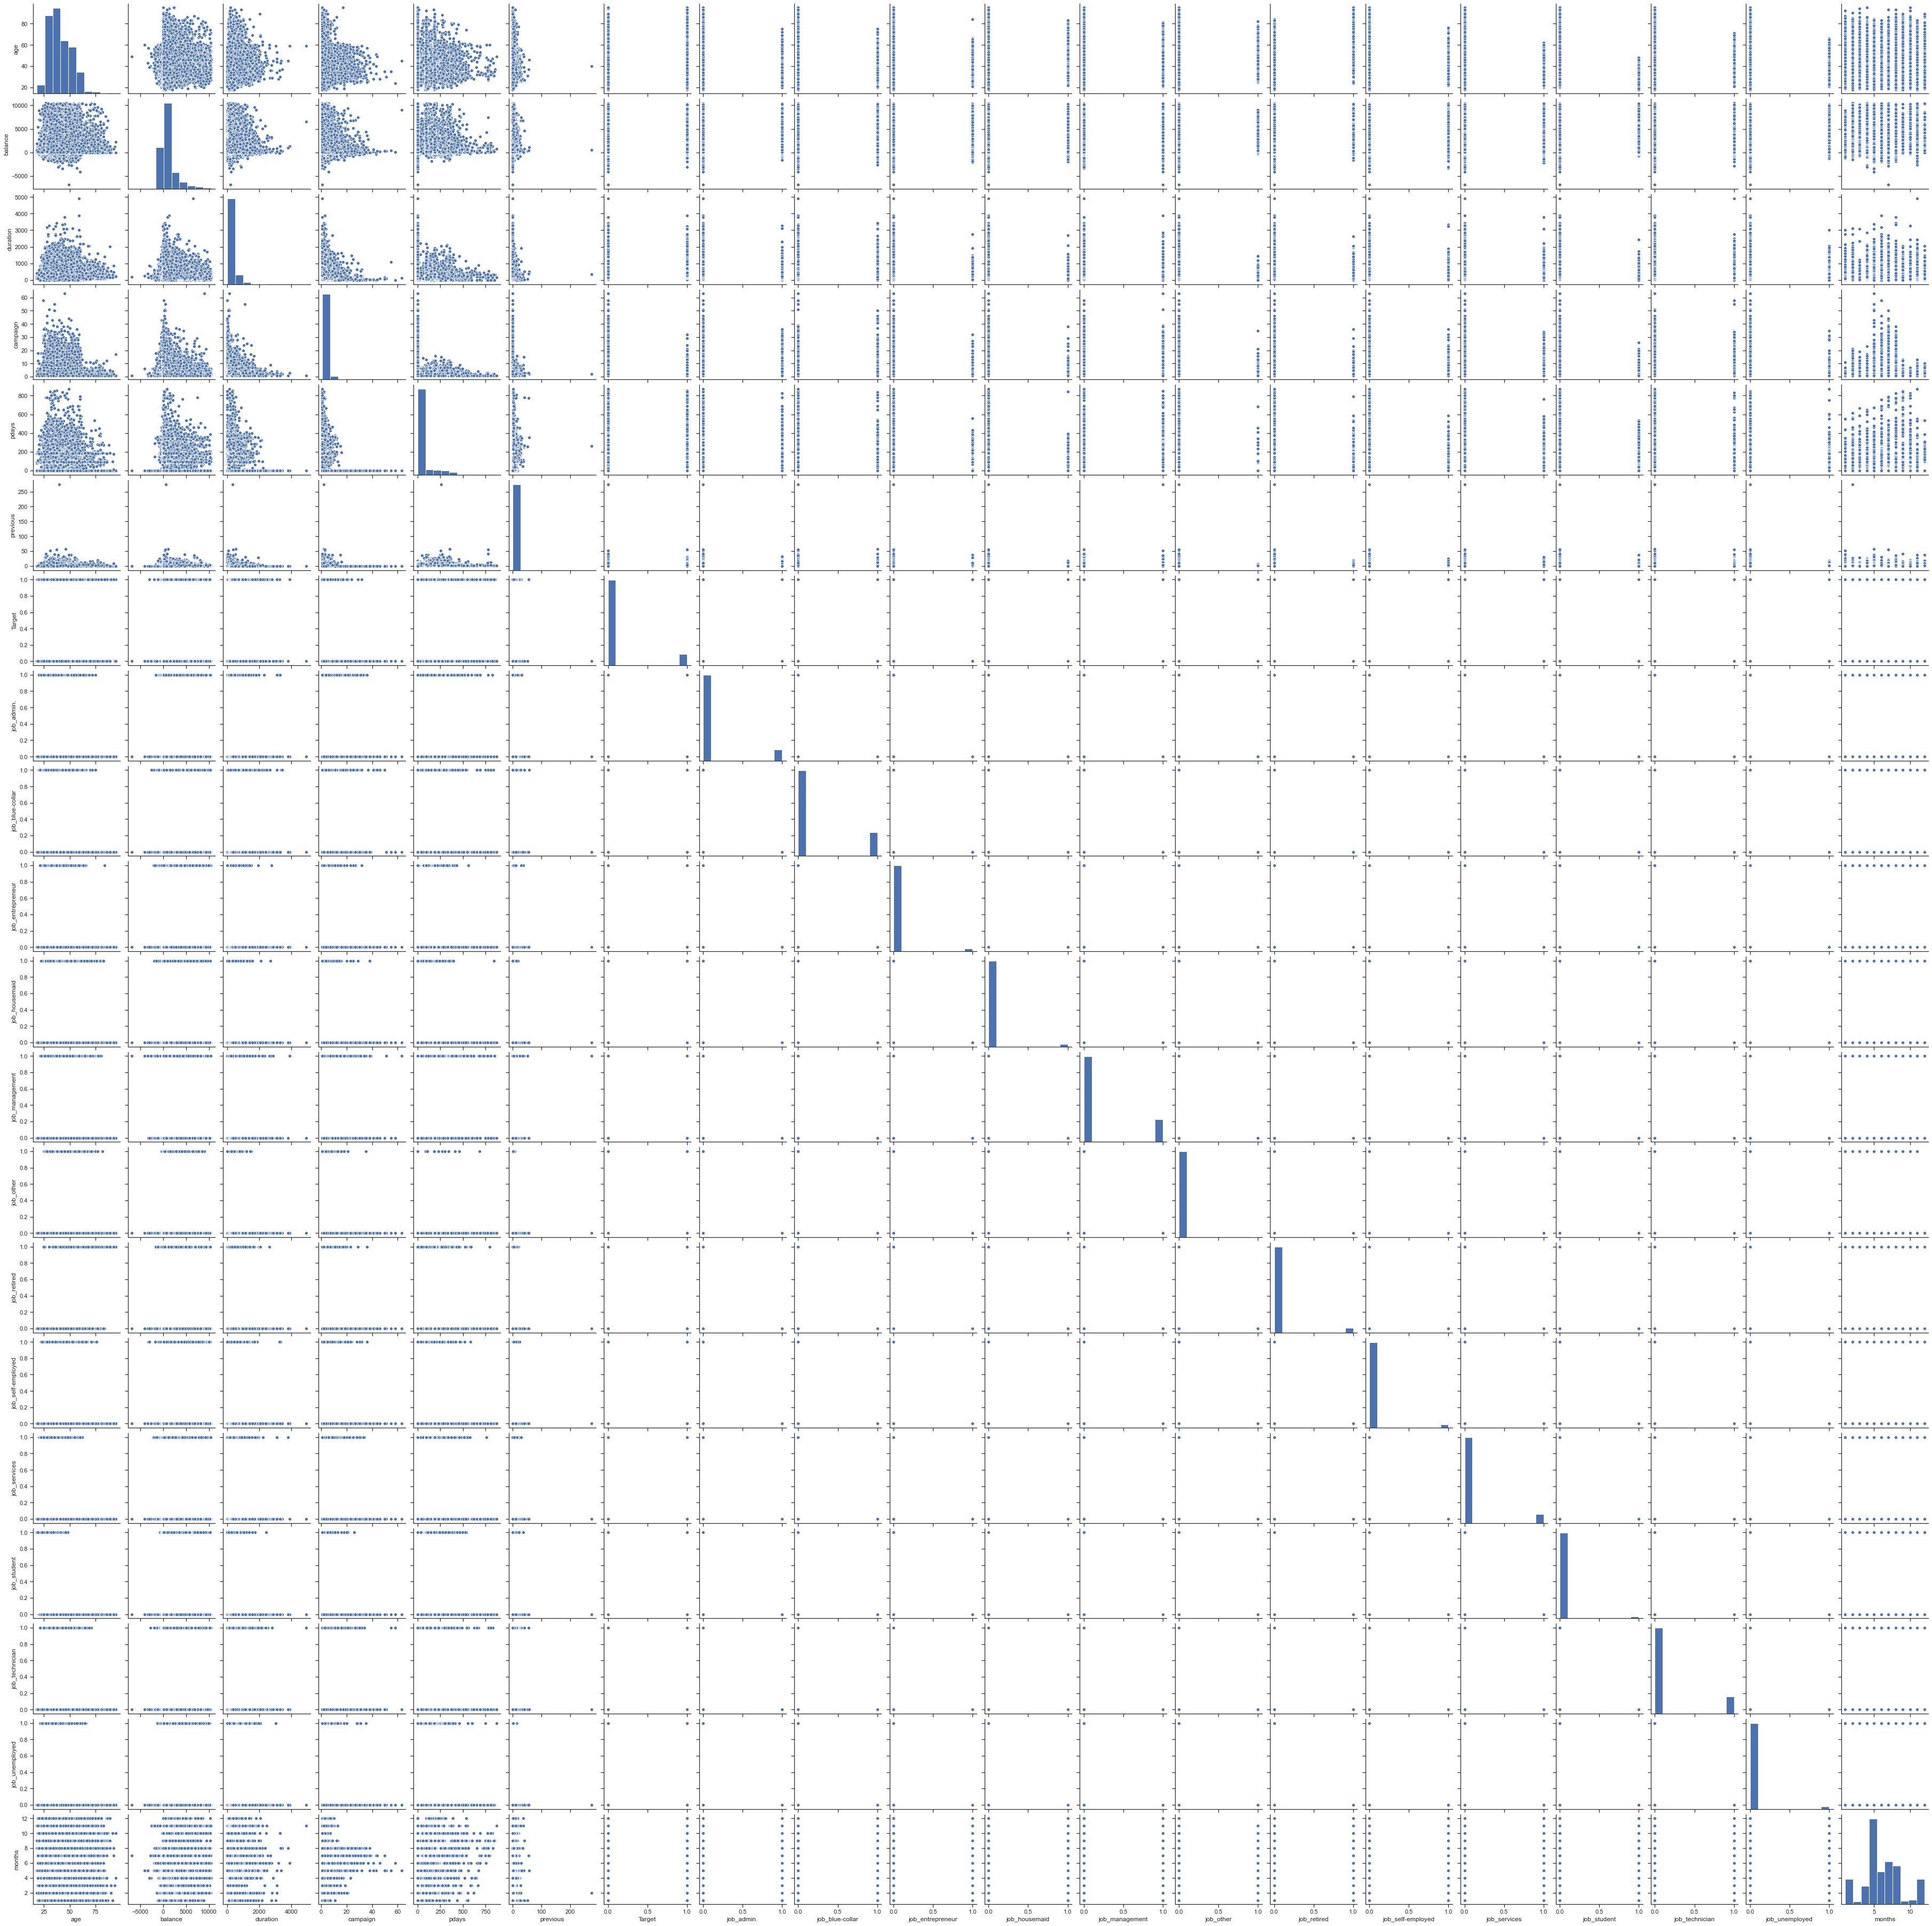

In [32]:
#This is trial, not providing much of info on Bank_data5 with dummy additions
sns.pairplot(Bank_data5)

<AxesSubplot:>

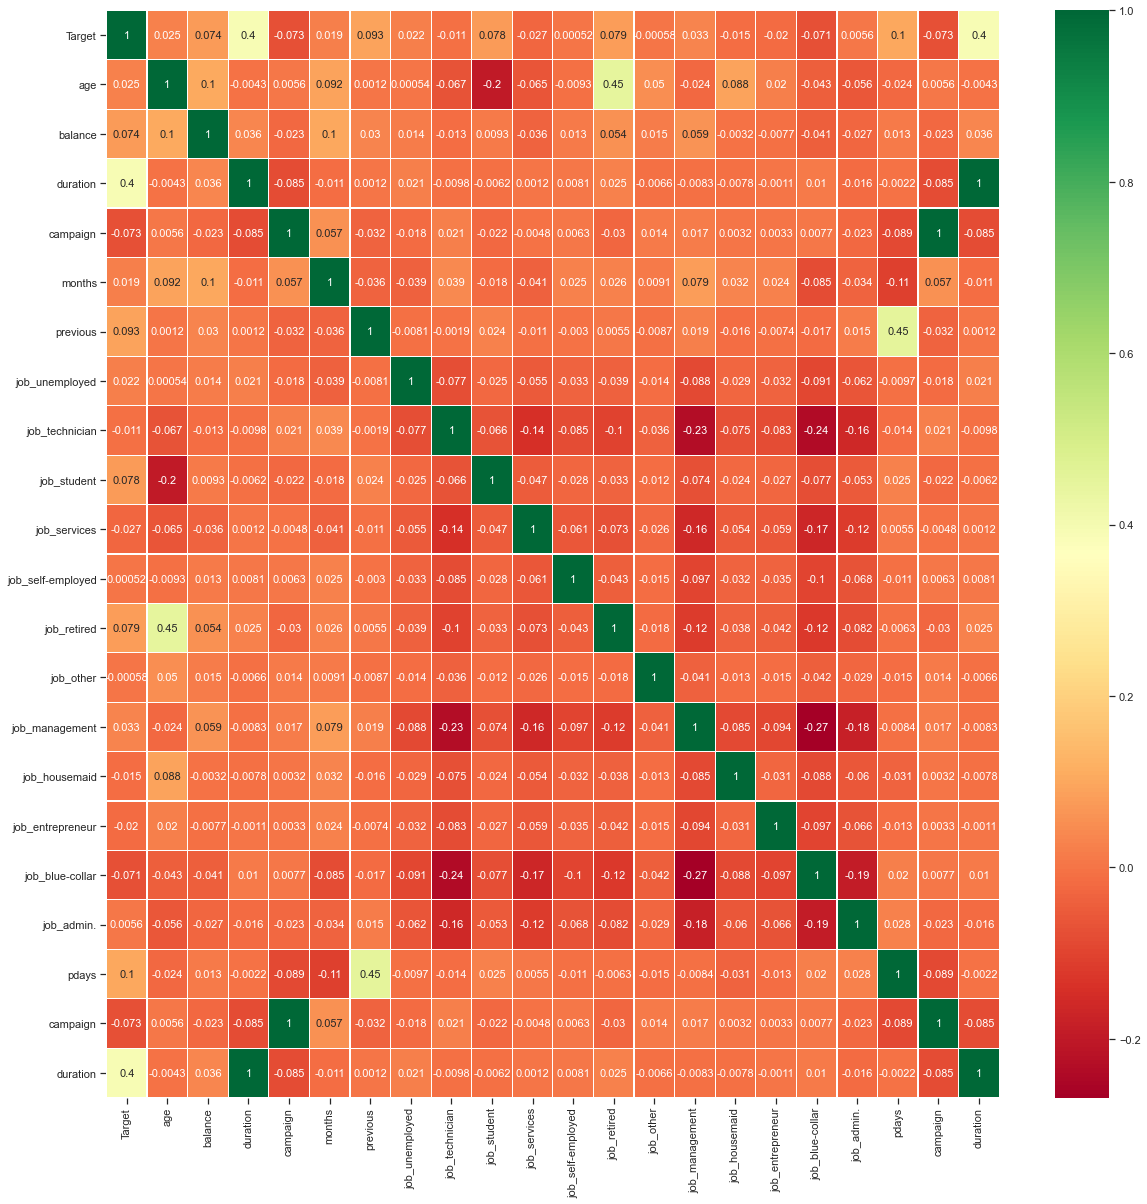

In [33]:
#Co-relation , heat map with Target need to refered on all int d-types
plt.figure(figsize = (20,20))
corr_data = Bank_data5[['Target','age','balance','duration','campaign','months','previous','job_unemployed','job_technician','job_student',
                        'job_services','job_self-employed','job_retired','job_other','job_management','job_housemaid','job_entrepreneur',
                           'job_blue-collar','job_admin.','pdays','campaign','duration']]

corr = corr_data.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':11})


#### Observation:
* Target seems to have considerable high co-relation with job_student,Job_retired,Job_managment,job_bluecollar,balance. Criteria >0.02
* Efforts from in considerable duration of talktime, pday, pervious contact campaign is providing fruitfull results with the target group values, Above reslut description has shown the same results, with optimal call time to spend and attempts to make.


In [34]:
Bank_data5['duration'] = Bank_data5['duration'].apply(lambda n:n/60).round(2)

Text(0.5, 20.80000000000001, 'Duration of Calls- Minutes')

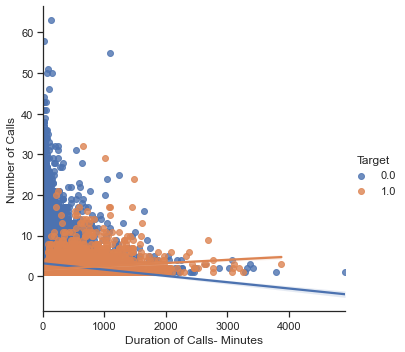

In [35]:
sns.lmplot(x='duration', y='campaign',data = Bank_data3,hue='Target')

plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls- Minutes')


Observation :To define optimal call time per customer would be 8 call per customer with average 30 min talk time with prospective customer as rough estimate based on the above graph.

In [36]:
count1 = pd.crosstab(Bank_data3['Target'],Bank_data3['job']).apply(lambda x: x/x.sum() * 100)
count1 = count1.transpose()

In [37]:
Bank_data3.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0.0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0.0
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0.0


Text(0, 0.5, 'Job Category')

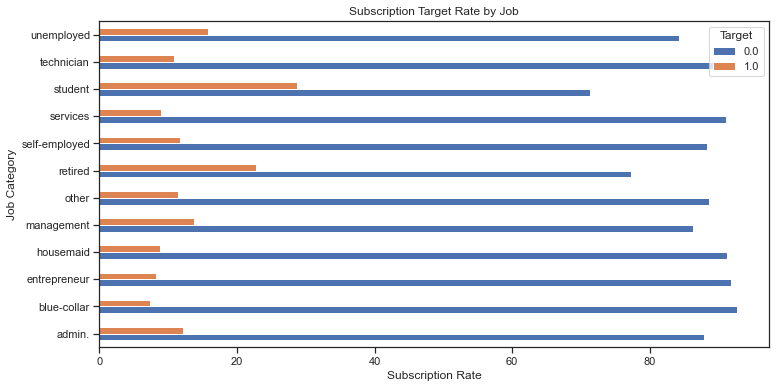

In [38]:
plot_job = count1.plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Subscription Target Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

Observation : As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

In [39]:
# groupby, to check data values and the influence
print("Customer Martial status count")
marital_count = Bank_data5.groupby("marital")["Target"].count()
print(marital_count.head(),'\n------------')
print("Customer Education status count",'\n-------------')
marital_count = Bank_data5.groupby("education")["Target"].count()
print(marital_count.head(),'\n------------')
print("Customer default status count",'\n-------------')
marital_count = Bank_data5.groupby("default")["Target"].count()
print(marital_count.head(),'\n------------')
print("Customer housing status count",'\n-------------')
marital_count = Bank_data5.groupby("housing")["Target"].count()
print(marital_count.head(),'\n------------')
print("Customer loan status count",'\n-------------')
marital_count = Bank_data5.groupby("loan")["Target"].count()
print(marital_count.head(),'\n------------')
print("Customer poutcome status count",'\n-------------')
marital_count = Bank_data5.groupby("poutcome")["Target"].count()
print(marital_count.head(),'\n----------')

Customer Martial status count
marital
divorced     5146
married     26729
single      12591
Name: Target, dtype: int64 
------------
Customer Education status count 
-------------
education
other         1822
primary       6778
secondary    22936
tertiary     12930
Name: Target, dtype: int64 
------------
Customer default status count 
-------------
default
no     43653
yes      813
Name: Target, dtype: int64 
------------
Customer housing status count 
-------------
housing
no     19649
yes    24817
Name: Target, dtype: int64 
------------
Customer loan status count 
-------------
loan
no     37261
yes     7205
Name: Target, dtype: int64 
------------
Customer poutcome status count 
-------------
poutcome
failure     4827
success     1470
unknown    38169
Name: Target, dtype: int64 
----------


#### Observation: 
By seeing the above count data 
* we can remove the "default" column as the "Yes" value is very less and influnce on the out come would be very less.
* we can remove the "Loan " column as the "Yes" value is very less and influnce on the out come would be very less.
* Like to keep " Poutcome " as the unknow values are more and see a oppurtunity and can infulence the data decision.
* Would check the influence " Matrial, education & Housing " columns on " Target"

In [40]:
Bank_data6=Bank_data5.drop(columns=['default', 'loan'])
Bank_data6.head(5)

,age,marital,education,balance,housing,duration,campaign,pdays,previous,poutcome,...,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months
0,58,married,tertiary,2143,yes,4.35,1,-1,0,unknown,...,0,1,0,0,0,0,0,0,0,5.0
1,44,single,secondary,29,yes,2.52,1,-1,0,unknown,...,0,0,0,0,0,0,0,1,0,5.0
2,33,married,secondary,2,yes,1.27,1,-1,0,unknown,...,0,0,0,0,0,0,0,0,0,5.0
3,47,married,other,1506,yes,1.53,1,-1,0,unknown,...,0,0,0,0,0,0,0,0,0,5.0
4,33,single,other,1,no,3.30,1,-1,0,unknown,...,0,0,1,0,0,0,0,0,0,5.0


In [41]:
# Trying see the co relation with object type data columns, with the heat map matrix to decide is it good to keep the modeling.
# Using label encoditing.

from sklearn import preprocessing 
lab_encoder = preprocessing.LabelEncoder() 

In [42]:
# label encoditing.
Bank_data6['marital']= lab_encoder.fit_transform(Bank_data6['marital']) 
Bank_data6['education']= lab_encoder.fit_transform(Bank_data6['education']) 
Bank_data6['housing']= lab_encoder.fit_transform(Bank_data6['housing']) 
Bank_data6['poutcome']= lab_encoder.fit_transform(Bank_data6['poutcome']) 

In [43]:
Bank_data6.head(5)

,age,marital,education,balance,housing,duration,campaign,pdays,previous,poutcome,...,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months
0,58,1,3,2143,1,4.35,1,-1,0,2,...,0,1,0,0,0,0,0,0,0,5.0
1,44,2,2,29,1,2.52,1,-1,0,2,...,0,0,0,0,0,0,0,1,0,5.0
2,33,1,2,2,1,1.27,1,-1,0,2,...,0,0,0,0,0,0,0,0,0,5.0
3,47,1,0,1506,1,1.53,1,-1,0,2,...,0,0,0,0,0,0,0,0,0,5.0
4,33,2,0,1,0,3.30,1,-1,0,2,...,0,0,1,0,0,0,0,0,0,5.0


<AxesSubplot:>

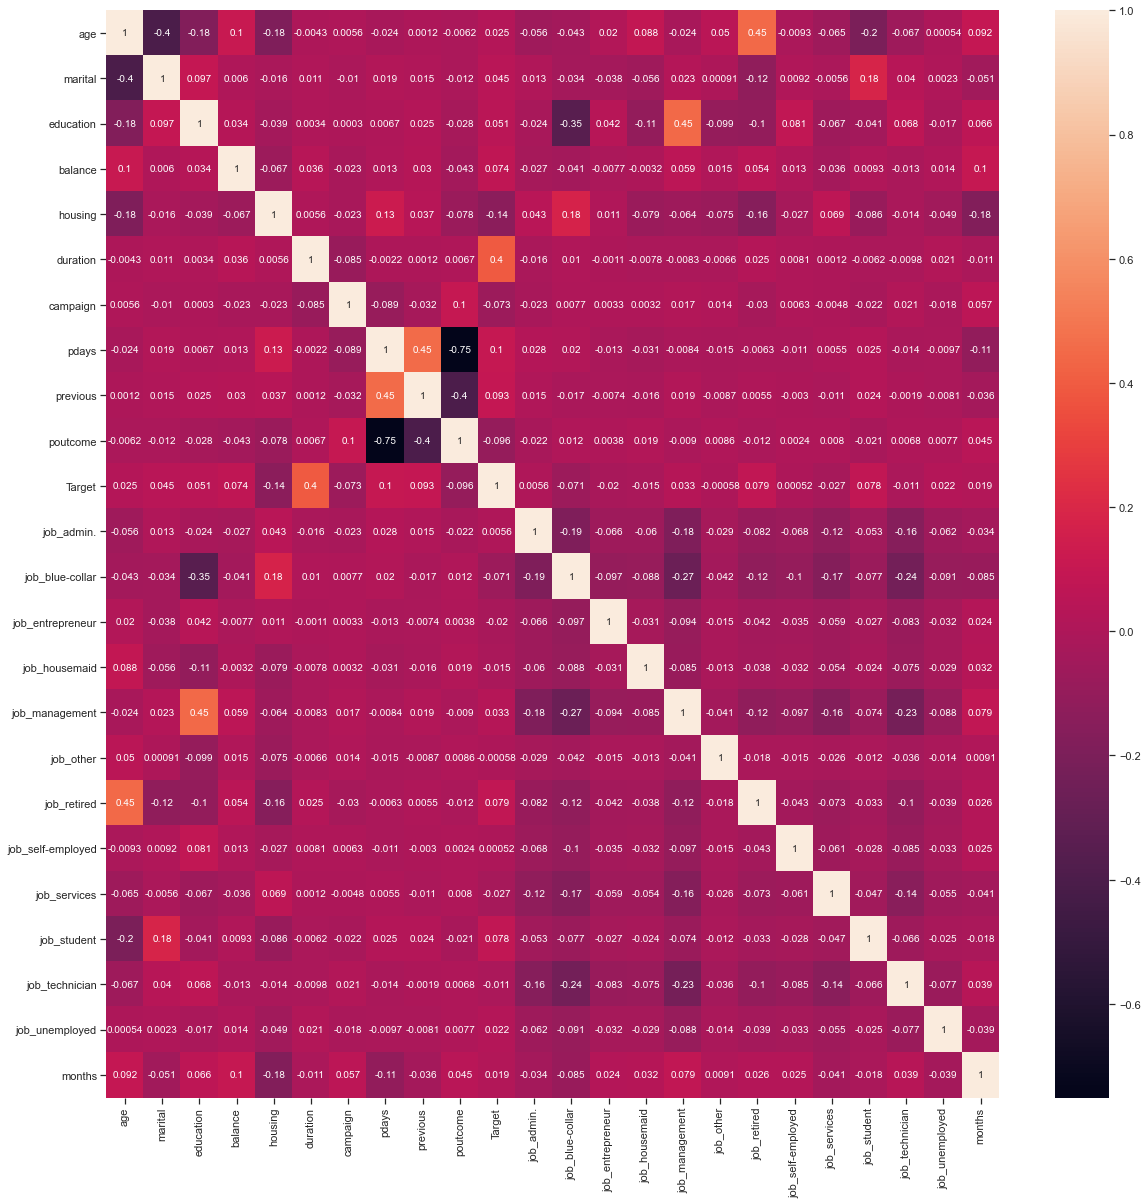

In [44]:
plt.figure(figsize = (20,20))
sns.heatmap(Bank_data6.corr(), annot=True)

In [45]:
# The correlation between every possible pair of attributes as a dataframe
Bank_data6.corr()   

,age,marital,education,balance,housing,duration,campaign,pdays,previous,poutcome,...,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months
age,1.000000,-0.402597,-0.175614,0.104874,-0.183683,-0.004314,0.005596,-0.023656,0.001154,-0.006233,...,0.088112,-0.024165,0.050408,0.446358,-0.009274,-0.065388,-0.197132,-0.066923,0.000541,0.091721
marital,-0.402597,1.000000,0.096944,0.005987,-0.016296,0.011093,-0.010055,0.019078,0.014824,-0.011755,...,-0.056471,0.023327,0.000910,-0.116406,0.009230,-0.005598,0.182450,0.039810,0.002323,-0.050827
education,-0.175614,0.096944,1.000000,0.033732,-0.039260,0.003443,0.000300,0.006720,0.024960,-0.027639,...,-0.107197,0.448724,-0.098910,-0.104600,0.081474,-0.066796,-0.040993,0.068150,-0.016998,0.065946
balance,0.104874,0.005987,0.033732,1.000000,-0.067238,0.036490,-0.023321,0.013070,0.029837,-0.043201,...,-0.003182,0.059161,0.015023,0.054371,0.012570,-0.035562,0.009306,-0.013420,0.014328,0.101052
housing,-0.183683,-0.016296,-0.039260,-0.067238,1.000000,0.005575,-0.023247,0.125191,0.037313,-0.078487,...,-0.078949,-0.064044,-0.075336,-0.156035,-0.026728,0.069397,-0.086385,-0.013896,-0.048716,-0.175055
duration,-0.004314,0.011093,0.003443,0.036490,0.005575,1.000000,-0.085073,-0.002235,0.001236,0.006664,...,-0.007796,-0.008328,-0.006598,0.025029,0.008080,0.001201,-0.006179,-0.009804,0.021011,-0.011132
campaign,0.005596,-0.010055,0.000300,-0.023321,-0.023247,-0.085073,1.000000,-0.089006,-0.032407,0.102978,...,0.003226,0.017440,0.013629,-0.029950,0.006251,-0.004781,-0.021503,0.020678,-0.018457,0.057093
pdays,-0.023656,0.019078,0.006720,0.013070,0.125191,-0.002235,-0.089006,1.000000,0.453749,-0.750892,...,-0.031458,-0.008390,-0.014884,-0.006276,-0.010796,0.005505,0.024622,-0.013923,-0.009707,-0.109412
previous,0.001154,0.014824,0.024960,0.029837,0.037313,0.001236,-0.032407,0.453749,1.000000,-0.399164,...,-0.015597,0.019430,-0.008704,0.005492,-0.003025,-0.010762,0.024073,-0.001877,-0.008113,-0.035696
poutcome,-0.006233,-0.011755,-0.027639,-0.043201,-0.078487,0.006664,0.102978,-0.750892,-0.399164,1.000000,...,0.019196,-0.009009,0.008609,-0.011527,0.002421,0.007973,-0.021449,0.006781,0.007707,0.045355


#### Observation
* poutcome , Houseing and campaign has very less influence on Target, Probaly we can delete the columns.

In [46]:
Bank_data7=Bank_data6.drop(columns=['poutcome', 'housing','campaign'])
Bank_data7.head(5)

,age,marital,education,balance,duration,pdays,previous,Target,job_admin.,job_blue-collar,...,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months
0,58,1,3,2143,4.35,-1,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,5.0
1,44,2,2,29,2.52,-1,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,5.0
2,33,1,2,2,1.27,-1,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
3,47,1,0,1506,1.53,-1,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
4,33,2,0,1,3.30,-1,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,5.0


### * Prepare Data for analysis

In [47]:
# To see the shape of the data Frame anf their Object types
print('The shape of the data frame Rows*Columns is = ', Bank_data7.shape , "\n--------------------------------------") 
print(Bank_data7.info())

The shape of the data frame Rows*Columns is =  (44466, 21) 
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44466 non-null  int64  
 1   marital            44466 non-null  int32  
 2   education          44466 non-null  int32  
 3   balance            44466 non-null  int64  
 4   duration           44466 non-null  float64
 5   pdays              44466 non-null  int64  
 6   previous           44466 non-null  int64  
 7   Target             44466 non-null  float64
 8   job_admin.         44466 non-null  uint8  
 9   job_blue-collar    44466 non-null  uint8  
 10  job_entrepreneur   44466 non-null  uint8  
 11  job_housemaid      44466 non-null  uint8  
 12  job_management     44466 non-null  uint8  
 13  job_other          44466 non-null  uint8  
 14  job_retired        

In [48]:
# Missing values if any.
Bank_data7.isnull().sum() 

age                  0
marital              0
education            0
balance              0
duration             0
pdays                0
previous             0
Target               0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_other            0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
months               0
dtype: int64

In [49]:
Bank_data7.describe()

,age,marital,education,balance,duration,pdays,previous,Target,job_admin.,job_blue-collar,...,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months
count,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,...,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000
mean,40.882382,1.167431,2.056403,1084.544483,4.300972,40.244614,0.579544,0.116224,0.115077,0.216952,...,0.027279,0.206742,0.006319,0.049723,0.034566,0.092812,0.020802,0.168263,0.028809,6.128345
std,10.596139,0.608986,0.777141,1721.069271,4.290663,100.268044,2.310143,0.320497,0.319118,0.412174,...,0.162898,0.404974,0.079244,0.217375,0.182679,0.290173,0.142724,0.374104,0.167270,2.397347
min,18.000000,0.000000,0.000000,-6847.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,33.000000,1.000000,2.000000,68.000000,1.720000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,39.000000,1.000000,2.000000,431.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,48.000000,2.000000,3.000000,1347.000000,5.320000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,95.000000,2.000000,3.000000,10483.000000,81.970000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [50]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

In [51]:
# returns z-scores of the values of the attribute
Bank_data7['balance_standard'] = std_scale.fit_transform(Bank_data7[['balance']]) 
Bank_data7['pdays_standard'] = std_scale.fit_transform(Bank_data7[['pdays']]) 
Bank_data7['previous_standard'] = std_scale.fit_transform(Bank_data7[['previous']]) 

In [52]:
print("balance_standard",Bank_data7['balance_standard'].describe(),'\n-------')
print("pdays_standard",Bank_data7['pdays_standard'].describe(),'\n-------')
print("previous_standard",Bank_data7['previous_standard'].describe(),'\n-------')

balance_standard count    4.446600e+04
mean     2.028643e-15
std      1.000011e+00
min     -4.608550e+00
25%     -5.906537e-01
50%     -3.797359e-01
75%      1.524973e-01
max      5.460885e+00
Name: balance_standard, dtype: float64 
-------
pdays_standard count    4.446600e+04
mean     2.270579e-13
std      1.000011e+00
min     -4.113482e-01
25%     -4.113482e-01
50%     -4.113482e-01
75%     -4.113482e-01
max      8.285439e+00
Name: pdays_standard, dtype: float64 
-------
previous_standard count    4.446600e+04
mean     1.739496e-13
std      1.000011e+00
min     -2.508721e-01
25%     -2.508721e-01
50%     -2.508721e-01
75%     -2.508721e-01
max      1.187907e+02
Name: previous_standard, dtype: float64 
-------


In [53]:
# Drop function 
Bank_data7=Bank_data7.drop(columns=['balance', 'pdays','previous'])
Bank_data7.head(5)

,age,marital,education,duration,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,months,balance_standard,pdays_standard,previous_standard
0,58,1,3,4.35,0.0,0,0,0,0,1,...,0,0,0,0,0,0,5.0,0.615006,-0.411348,-0.250872
1,44,2,2,2.52,0.0,0,0,0,0,0,...,0,0,0,0,1,0,5.0,-0.613314,-0.411348,-0.250872
2,33,1,2,1.27,0.0,0,0,1,0,0,...,0,0,0,0,0,0,5.0,-0.629002,-0.411348,-0.250872
3,47,1,0,1.53,0.0,0,1,0,0,0,...,0,0,0,0,0,0,5.0,0.244883,-0.411348,-0.250872
4,33,2,0,3.30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,5.0,-0.629583,-0.411348,-0.250872


### Data Model

In [54]:
# building a linear Regression model
# independant variables
X = Bank_data7.drop(['Target'], axis=1)
# the dependent variable
y = Bank_data7[['Target']]

In [55]:
# Spliting X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [56]:
print('X variable shapes',"\n", X_train.shape)
print(X_test.shape,"\n-----------------")

print('Y Variable shapes',"\n",y_train.shape)
print(y_test.shape)

X variable shapes 
 (22233, 20)
(22233, 20) 
-----------------
Y Variable shapes 
 (22233, 1)
(22233, 1)


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os,sys
from scipy import stats
from sklearn import metrics

In [58]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_predict = logreg.predict(X_test)

In [60]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8918274636801151 
----------
Testing accuracy 0.8887239688750955 
----------
Confusion Matrix


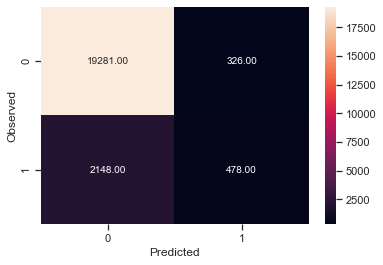

None
Recall: 0.18202589489718202 
----------
Precision: 0.5945273631840796 
----------
F1 Score: 0.27871720116618076 
----------
Roc Auc Score: 0.5826995899742196 
----------


In [61]:
print("Trainig accuracy",logreg.score(X_train,y_train),"\n----------")  

print("Testing accuracy",logreg.score(X_test, y_test),"\n----------")

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

print("Recall:",recall_score(y_test,y_predict),"\n----------")

print("Precision:",precision_score(y_test,y_predict),"\n----------")

print("F1 Score:",f1_score(y_test,y_predict),"\n----------")

print("Roc Auc Score:",roc_auc_score(y_test,y_predict),"\n----------")

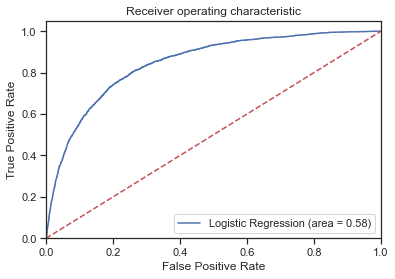

In [62]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [63]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C,"\n")

print(train_score,"\n")

print(test_score,"\n")

[0.01, 0.1, 0.25, 0.5, 0.75, 1] 

[0.794, 0.797, 0.797, 0.797, 0.796, 0.796] 

[0.798, 0.802, 0.802, 0.802, 0.802, 0.802] 



In [64]:
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.25) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train),"\n----------")  

print("Testing accuracy",model.score(X_test, y_test),"\n----------")

print("Recall:",recall_score(y_test,y_predict),"\n----------")

print("Precision:",precision_score(y_test,y_predict),"\n----------")

print("F1 Score:",f1_score(y_test,y_predict),"\n----------")

print("Roc Auc Score:",roc_auc_score(y_test,y_predict),"\n----------")

Trainig accuracy 0.7966986011784285 
----------
Testing accuracy 0.8018710925201278 
----------
Recall: 0.7296268088347296 
----------
Precision: 0.3414721083585814 
----------
F1 Score: 0.46521791914531996 
----------
Roc Auc Score: 0.7705868526756399 
----------


< ---- Confusion Matrix ---- >


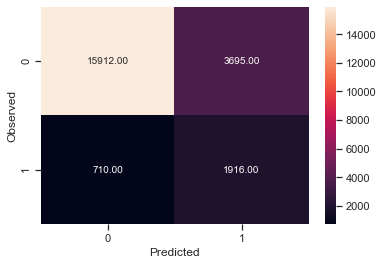

None


In [65]:
print('< ---- Confusion Matrix ---- >')
print(draw_cm(y_test,y_predict))

In [66]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88     19607
         1.0       0.34      0.73      0.47      2626

    accuracy                           0.80     22233
   macro avg       0.65      0.77      0.67     22233
weighted avg       0.88      0.80      0.83     22233



#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [69]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8609724283722394


In [70]:
# Reducing the over fitting of the model by changeing the depth
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.892637071020555
0.8871047541942157


Observation: Accuracy is  close the liner gression model, max depth 3 is good.

In [71]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.072526
marital            0.000000
education          0.000000
duration           0.795398
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_other          0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
months             0.000000
balance_standard   0.000000
pdays_standard     0.113367
previous_standard  0.018709


0.8871047541942157

 ------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     19607
         1.0       0.56      0.21      0.30      2626

    accuracy                           0.89     22233
   macro avg       0.73      0.59      0.62     22233
weighted avg       0.86      0.89      0.86     22233



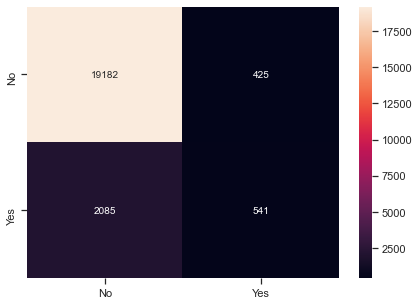

In [72]:
print(dTreeR.score(X_test , y_test))
y_predicttree = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test,y_predicttree, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
print('\n ------------------------------------------------------------------')
print(classification_report(y_test, y_predicttree))

  #### Ensemble Learning - Bagging

In [73]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

0.8964152386092745


<AxesSubplot:>

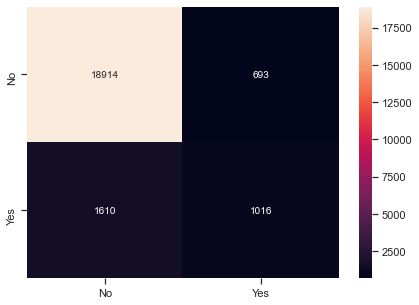

In [74]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#### Ensemble Learning - GradientBoost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8947510457428147


<AxesSubplot:>

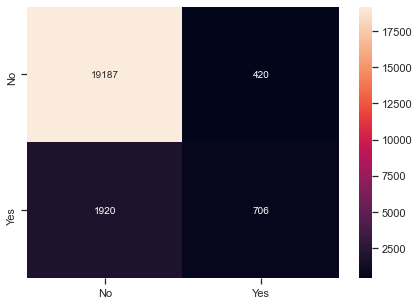

In [76]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Ensemble RandomForest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.8973597805064544


<AxesSubplot:>

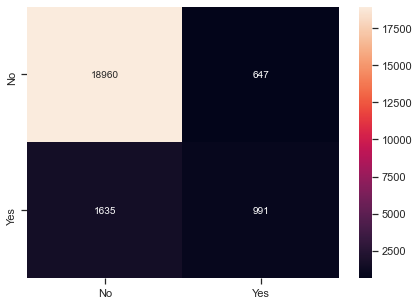

In [78]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Observation: Looks Bagging is offering max targets, seems to be good.

In [79]:
# Models Summary :

from sklearn.metrics import f1_score


In [80]:
#gives model report in dataframe
def model_report(model,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
       
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc] })
    return df

In [81]:
#outputs for  models to compare, not able ti install plotly

model_LR = model_report(logreg,"Logistic Regression")
model_DT = model_report(dTreeR,"Decision Tree")
model_RF = model_report(rfcl,"Random Forest")
model_GB = model_report(gbcl,"Gradient Boosting")
model_BC = model_report(bgcl,"BaggingClassifier")
#concat all models
model_performances = pd.concat([model_LR,model_DT,model_RF,model_GB,model_BC],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
print(model_performances)


                 Model  Accuracy_score  Recall_score  Precision  f1_score  \
0  Logistic Regression        0.888724      0.182026   0.594527  0.278717   
1        Decision Tree        0.887105      0.206017   0.560041  0.301225   
2        Random Forest        0.897360      0.377380   0.605006  0.464822   
3    Gradient Boosting        0.894751      0.268850   0.626998  0.376333   
4    BaggingClassifier        0.896415      0.386900   0.594500  0.468743   

   Area_under_curve  
0          0.582700  
1          0.592170  
2          0.672191  
3          0.623715  
4          0.675778  


### Observation :
* From previous EDA overlook, best group is to target would be students and retired groups.
* Observed had Bagging classifer model is provideing max focused target group to marketing team.

GIT HUB :
    
    https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-ssetty3.git